<a href="https://colab.research.google.com/github/robsworld718/Gender_Inequality_HIV/blob/main/Gender_Inequality_HIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/Jan 2021 Data - Viz5 Gender Inequality and HIVAIDS.csv'

In [3]:
Gender_hiv = pd.read_csv(filename, encoding= 'unicode_escape')
Gender_hiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         2640 non-null   object 
 1   UNICEF Region                                                                   2640 non-null   object 
 2   Year                                                                            2640 non-null   int64  
 3   Sex                                                                             2640 non-null   object 
 4   Age                                                                             2640 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population   2520 non-null   float64
 6   Estimated number

In [4]:
Gender_hiv.duplicated().any()

False

In [5]:
Gender_hiv.shape

(2640, 10)

In [6]:
Gender_hiv.isnull().sum()

Country                                                                             0
UNICEF Region                                                                       0
Year                                                                                0
Sex                                                                                 0
Age                                                                                 0
Estimated incidence rate of new HIV infection per 1 000 uninfected population     120
Estimated number of annual AIDS related deaths                                     60
Estimated number of annual new HIV infections                                     120
Estimated number of people living with HIV                                          0
Estimated rate of annual AIDS related deaths  per 100 000 population               60
dtype: int64

In [7]:
Gender_hiv.isnull().sum().sum()

360

In [8]:
## Filling NULL values

In [9]:
Gender_hiv[Gender_hiv['Estimated incidence rate of new HIV infection per 1 000 uninfected population '].isnull()]

,Country,UNICEF Region,Year,Sex,Age,Estimated incidence rate of new HIV infection per 1 000 uninfected population,Estimated number of annual AIDS related deaths,Estimated number of annual new HIV infections,Estimated number of people living with HIV,Estimated rate of annual AIDS related deaths per 100 000 population
1320,Mali,West and Central Africa,1990,Female,Age 10-19,NaN,100.0,NaN,3600,2.22
1321,Mali,West and Central Africa,1990,Male,Age 10-19,NaN,100.0,NaN,1000,0.69
1322,Mali,West and Central Africa,1991,Female,Age 10-19,NaN,100.0,NaN,4000,2.55
1323,Mali,West and Central Africa,1991,Male,Age 10-19,NaN,100.0,NaN,1100,0.76
1324,Mali,West and Central Africa,1992,Female,Age 10-19,NaN,100.0,NaN,4200,2.86
...,...,...,...,...,...,...,...,...,...,...
1495,Mauritania,West and Central Africa,2017,Male,Age 10-19,NaN,100.0,NaN,200,1.66
1496,Mauritania,West and Central Africa,2018,Female,Age 10-19,NaN,100.0,NaN,200,1.42
1497,Mauritania,West and Central Africa,2018,Male,Age 10-19,NaN,100.0,NaN,200,1.61
1498,Mauritania,West and Central Africa,2019,Female,Age 10-19,NaN,100.0,NaN,200,1.38


In [10]:
## Created a new dataframe to fill Null values, the fillna() for the specific column data restreived the original data from the dataframe?
Gender_hiv2 = Gender_hiv.fillna(value=Gender_hiv['Estimated incidence rate of new HIV infection per 1 000 uninfected population '].mean())
Gender_hiv2

,Country,UNICEF Region,Year,Sex,Age,Estimated incidence rate of new HIV infection per 1 000 uninfected population,Estimated number of annual AIDS related deaths,Estimated number of annual new HIV infections,Estimated number of people living with HIV,Estimated rate of annual AIDS related deaths per 100 000 population
0,Angola,Eastern and Southern Africa,1990,Female,Age 10-19,0.64,100.0,500.0,860,0.36
1,Angola,Eastern and Southern Africa,1990,Male,Age 10-19,0.15,100.0,100.0,200,0.07
2,Angola,Eastern and Southern Africa,1991,Female,Age 10-19,0.75,100.0,500.0,1100,0.42
3,Angola,Eastern and Southern Africa,1991,Male,Age 10-19,0.17,100.0,200.0,500,0.14
4,Angola,Eastern and Southern Africa,1992,Female,Age 10-19,0.88,100.0,590.0,1300,0.54
...,...,...,...,...,...,...,...,...,...,...
2635,Zimbabwe,Eastern and Southern Africa,2017,Male,Age 10-19,1.66,900.0,1200.0,37000,57.28
2636,Zimbabwe,Eastern and Southern Africa,2018,Female,Age 10-19,6.05,770.0,4400.0,48000,48.39
2637,Zimbabwe,Eastern and Southern Africa,2018,Male,Age 10-19,1.46,800.0,1100.0,37000,49.97
2638,Zimbabwe,Eastern and Southern Africa,2019,Female,Age 10-19,5.99,690.0,4400.0,48000,42.18


In [11]:
Gender_hiv2.isnull().sum()

Country                                                                           0
UNICEF Region                                                                     0
Year                                                                              0
Sex                                                                               0
Age                                                                               0
Estimated incidence rate of new HIV infection per 1 000 uninfected population     0
Estimated number of annual AIDS related deaths                                    0
Estimated number of annual new HIV infections                                     0
Estimated number of people living with HIV                                        0
Estimated rate of annual AIDS related deaths  per 100 000 population              0
dtype: int64

In [12]:
Gender_hiv2.describe()

,Year,Estimated incidence rate of new HIV infection per 1 000 uninfected population,Estimated number of annual AIDS related deaths,Estimated number of annual new HIV infections,Estimated number of people living with HIV,Estimated rate of annual AIDS related deaths per 100 000 population
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,2004.500000,3.751397,383.126926,2651.234912,13023.984848,16.414229
std,8.657081,7.484338,515.121572,7502.647664,27010.089271,21.335070
min,1990.000000,0.010000,3.751397,3.751397,100.000000,0.010000
25%,1997.000000,0.350000,100.000000,100.000000,630.000000,2.407500
50%,2004.500000,1.310000,100.000000,500.000000,3300.000000,8.600000
75%,2012.000000,3.751397,500.000000,1900.000000,13000.000000,21.075000
max,2019.000000,70.630000,3500.000000,90000.000000,250000.000000,138.240000


In [13]:
## After reviewing the dataframe I'll further analyze and get counts of specific counts of column data
Gender_hiv2.dtypes

Country                                                                            object
UNICEF Region                                                                      object
Year                                                                                int64
Sex                                                                                object
Age                                                                                object
Estimated incidence rate of new HIV infection per 1 000 uninfected population     float64
Estimated number of annual AIDS related deaths                                    float64
Estimated number of annual new HIV infections                                     float64
Estimated number of people living with HIV                                          int64
Estimated rate of annual AIDS related deaths  per 100 000 population              float64
dtype: object

In [14]:
## Number of countries
Gender_hiv2['Country'].nunique()

44

In [15]:
## By Unicef regions
Gender_hiv2['UNICEF Region'].value_counts()

Eastern and Southern Africa    1320
West and Central Africa        1320
Name: UNICEF Region, dtype: int64

In [16]:
## Number of years
Gender_hiv2['Year'].value_counts().sort_index()

1990    88
1991    88
1992    88
1993    88
1994    88
1995    88
1996    88
1997    88
1998    88
1999    88
2000    88
2001    88
2002    88
2003    88
2004    88
2005    88
2006    88
2007    88
2008    88
2009    88
2010    88
2011    88
2012    88
2013    88
2014    88
2015    88
2016    88
2017    88
2018    88
2019    88
Name: Year, dtype: int64

In [17]:
## We can see the data reported for each gender
Gender_hiv2['Sex'].value_counts()

Female    1320
Male      1320
Name: Sex, dtype: int64

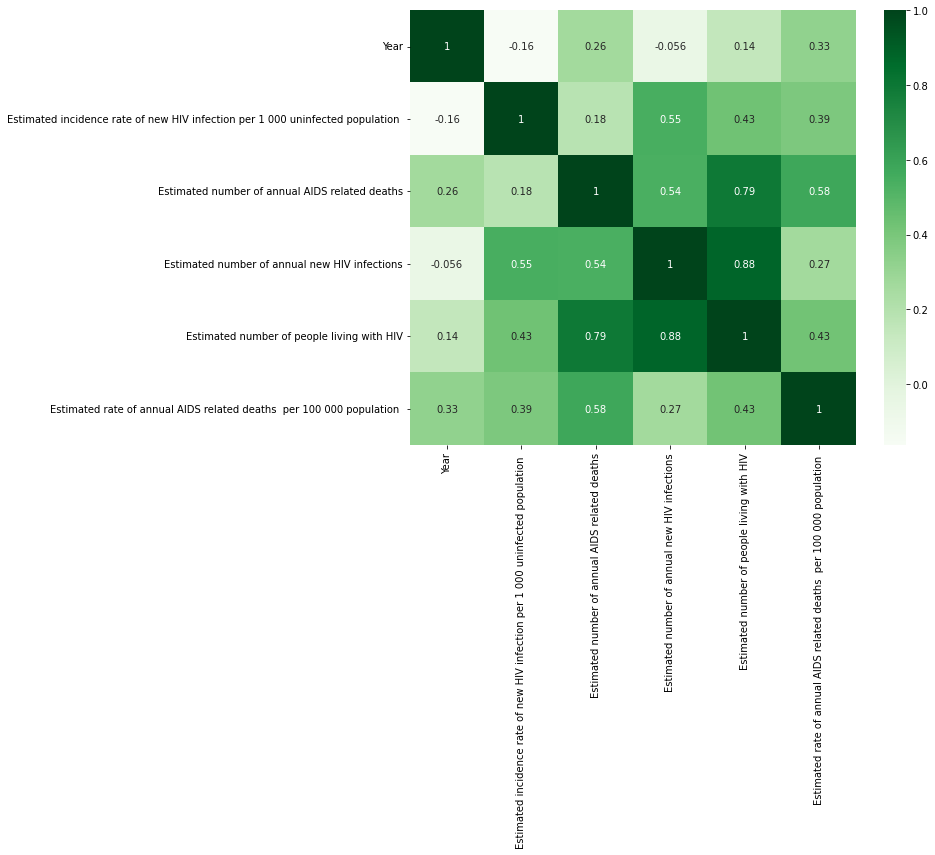

In [18]:
corr = Gender_hiv2.corr()

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [19]:
Gender_hiv3 = Gender_hiv2['Year'].to_numpy(), Gender_hiv2.set_index('Year')
Gender_hiv3

(array([1990, 1990, 1991, ..., 2018, 2019, 2019]),
        Country  ... Estimated rate of annual AIDS related deaths  per 100 000 population 
 Year            ...                                                                      
 1990    Angola  ...                                               0.36                   
 1990    Angola  ...                                               0.07                   
 1991    Angola  ...                                               0.42                   
 1991    Angola  ...                                               0.14                   
 1992    Angola  ...                                               0.54                   
 ...        ...  ...                                                ...                   
 2017  Zimbabwe  ...                                              57.28                   
 2018  Zimbabwe  ...                                              48.39                   
 2018  Zimbabwe  ...                   

In [20]:
New_living_peranum = Gender_hiv2.groupby(['Year'])[['Estimated number of people living with HIV', 'Estimated number of annual new HIV infections']].mean()
New_living_peranum
## The estimated new HIV infection rates steadily declined from 1998 where they peaked at 3330.738700.

,Estimated number of people living with HIV,Estimated number of annual new HIV infections
Year,,
1990,4958.068182,2276.079609
1991,5847.386364,2570.511427
1992,6696.477273,2845.170518
1993,7465.454545,3047.556882
1994,8219.772727,3194.829609
1995,8769.886364,3293.920518
1996,9277.386364,3328.693245
1997,9800.000000,3330.625063
1998,10250.340909,3330.738700


In [21]:
living_with = Gender_hiv2.groupby(['Year'])['Estimated number of people living with HIV'].mean()
living_with

Year
1990     4958.068182
1991     5847.386364
1992     6696.477273
1993     7465.454545
1994     8219.772727
1995     8769.886364
1996     9277.386364
1997     9800.000000
1998    10250.340909
1999    10738.636364
2000    11356.250000
2001    11905.340909
2002    12368.863636
2003    12860.681818
2004    13409.772727
2005    13996.022727
2006    14487.840909
2007    15073.977273
2008    15520.227273
2009    16082.045455
2010    16550.795455
2011    16780.681818
2012    17089.772727
2013    17277.840909
2014    17257.500000
2015    17411.590909
2016    17345.454545
2017    17324.545455
2018    17280.454545
2019    17316.477273
Name: Estimated number of people living with HIV, dtype: float64

In [22]:
peranum3 = Gender_hiv2.groupby(['Year'])['Estimated number of annual new HIV infections'].mean()
peranum3

Year
1990    2276.079609
1991    2570.511427
1992    2845.170518
1993    3047.556882
1994    3194.829609
1995    3293.920518
1996    3328.693245
1997    3330.625063
1998    3330.738700
1999    3299.375063
2000    3256.420518
2001    3183.352336
2002    3109.147791
2003    2993.579609
2004    2893.806882
2005    2792.443245
2006    2733.011427
2007    2668.693245
2008    2611.761427
2009    2557.102336
2010    2469.829609
2011    2362.784154
2012    2289.602336
2013    2182.784154
2014    2077.329609
2015    1971.306882
2016    1871.761427
2017    1765.170518
2018    1652.670518
2019    1576.988700
Name: Estimated number of annual new HIV infections, dtype: float64

In [72]:
aids_related_deaths = Gender_hiv2.groupby(['Year'])['Estimated number of annual AIDS related deaths'].mean()
aids_related_deaths

Year
1990    117.130714
1991    119.403441
1992    135.312532
1993    143.267077
1994    157.017077
1995    163.607986
1996    190.085259
1997    213.721623
1998    238.721623
1999    257.812532
2000    286.335259
2001    343.948895
2002    390.426168
2003    438.267077
2004    480.539804
2005    520.085259
2006    552.357986
2007    575.653441
2008    579.062532
2009    573.380714
2010    562.244350
2011    565.426168
2012    549.062532
2013    540.767077
2014    517.471623
2015    505.085259
2016    480.994350
2017    456.107986
2018    429.630714
2019    410.880714
Name: Estimated number of annual AIDS related deaths, dtype: float64

In [60]:
aids_related_deaths_peranum = Gender_hiv2.groupby(['Year', 'Country'])['Estimated rate of annual AIDS related deaths  per 100 000 population '].mean()
aids_related_deaths_peranum.head(10)

Year  Country                         
1990  Angola                              0.215
      Benin                               0.010
      Burkina Faso                        3.005
      Burundi                             2.905
      Cameroon                            0.710
      Central African Republic            2.085
      Chad                                1.265
      Congo                               3.690
      Côte d'Ivoire                       2.030
      Democratic Republic of the Congo    2.085
Name: Estimated rate of annual AIDS related deaths  per 100 000 population , dtype: float64

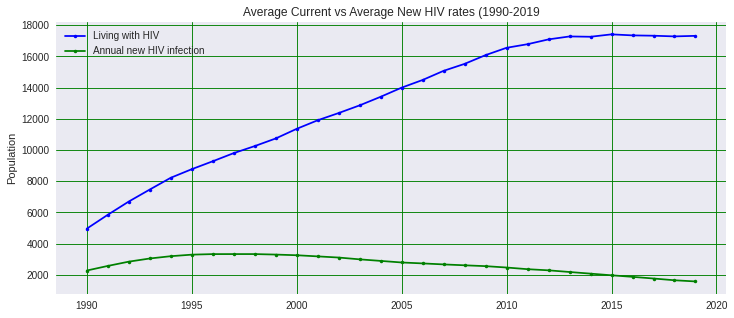

In [77]:
## I decided to plot each respective column by year based on their highest correlations
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.grid(c = 'g', 
         alpha = .9,
         linestyle = '-')

plt.plot(living_with,
         color = 'blue',
         marker = '.',
         label = 'Living with HIV')

plt.plot(peranum3,
         color = 'green',
         marker = '.',
         label = 'Annual new HIV infection')

plt.legend()
plt.title('Average Current vs Average New HIV rates (1990-2019')
plt.ylabel('Population');

#Infection rates 

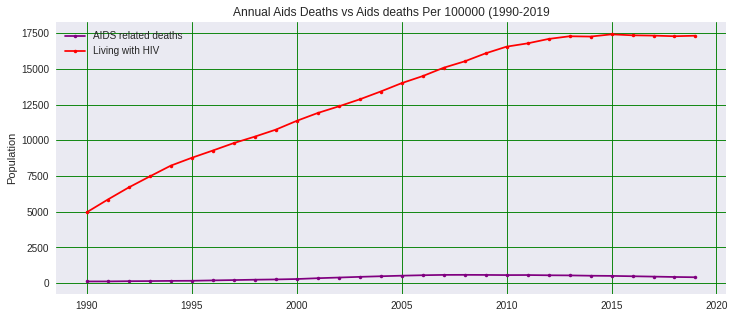

In [78]:
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.grid(c = 'g', 
         alpha = .9,
         linestyle = '-')

plt.plot(aids_related_deaths,
         color = 'purple',
         marker = '.',
         label = 'AIDS related deaths')

plt.plot(living_with,
         color = 'red',
         marker = '.',
         label = 'Living with HIV')

plt.legend()
plt.title('Annual Aids Deaths vs Aids deaths Per 100000 (1990-2019')
plt.ylabel('Population');

#Infection rates of people living with HIV increase from 1990 until they reached an average peak of 17,411 in 2015.